In [5]:
#pip install --upgrade pip
#python3 -m pip install -r ../requirements.txt
#import nltk
#nltk.download('all')

In [6]:
!ls ../datasets/pap/train-dev-test-split/binary

dev.csv  test.csv  train.csv


## Tabular Representation of the Pap dataset

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

PAP_PATH = '../datasets/pap/train-dev-test-split/binary'
train_file = f'{PAP_PATH}/train.csv'
dev_file = f'{PAP_PATH}/dev.csv'
test_file = f'{PAP_PATH}/test.csv'

train_df = pd.read_csv(train_file)
dev_df = pd.read_csv(dev_file)
test_df = pd.read_csv(test_file)


df = pd.concat([train_df, dev_df, test_df])
df = df.rename(columns={'original_label': 'category'})

df['nn_1'] = [sent.split()[0] for sent in df['text']]
df['v'] = [sent.split()[1] for sent in df['text']]
df['nn_2'] = [sent.split()[2] for sent in df['text']]

df.head(2)

,text,category,label,nn_1,v,nn_2
0,event occurs year,plausible,1,event,occurs,year
1,tortoise brings limb,plausible,1,tortoise,brings,limb


## __Characterstic 1:__ Frequency of words using Word Cloud

### All (train + dev + test splits)

Looking at the wordcloud we can se that the most relevant word in the dataset seems to be `person` and the concepts gravitating arouund it are also activieties/concepts ralated to person.

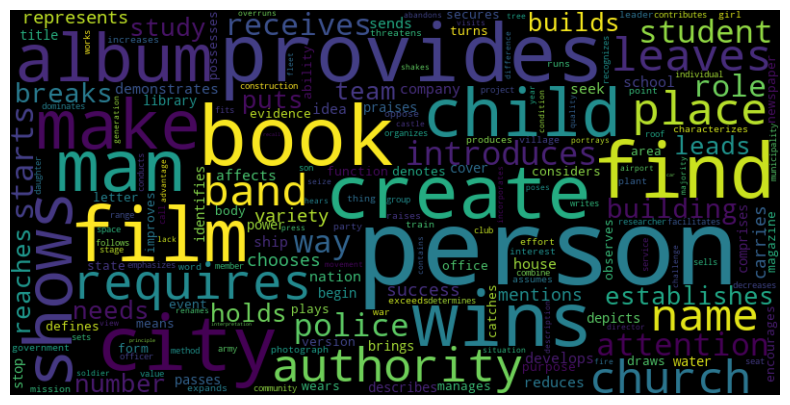

In [16]:
text_data_all = '\n'.join(df['text']) # using \n character as the delimiter btw texts in each row.
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data_all)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Training

The training data resambles the whole dataset.

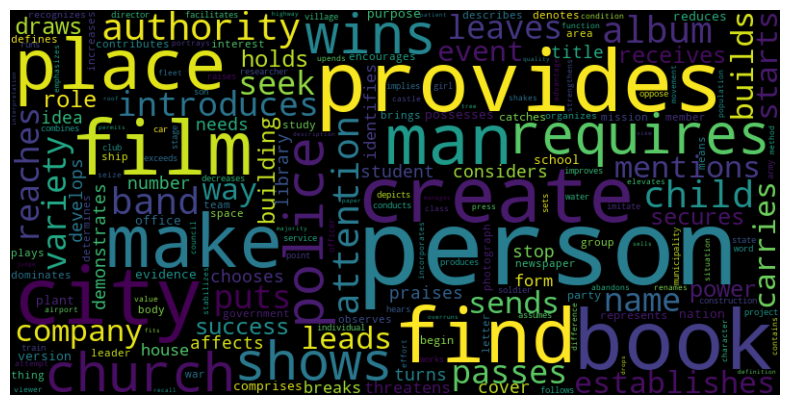

In [17]:
text_data_train = '\n'.join(train_df['text']) # using \n character as the delimiter btw texts in each row.
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data_train)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Dev

The main topic of the dev data still person `person` but the context around it is different.

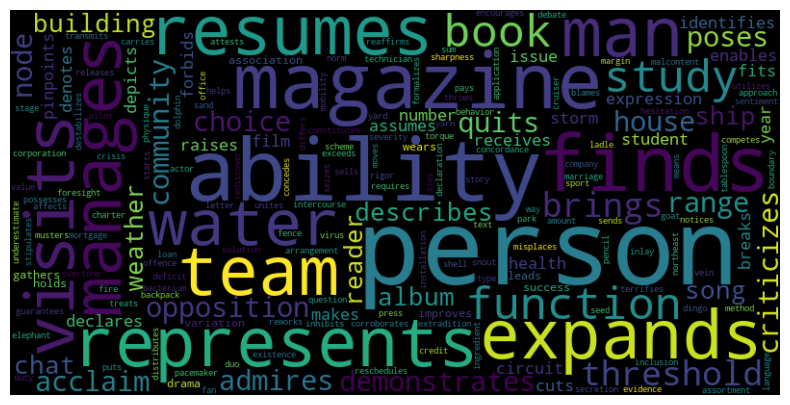

In [18]:
text_data_dev = '\n'.join(dev_df['text']) # using \n character as the delimiter btw texts in each row.
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data_dev)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Test

The test data main topic is `daughter` and the context words can be words related to it. The text data is a little different than the trains and dev splits. That makes sense if teh model has to generalize on differents topics.

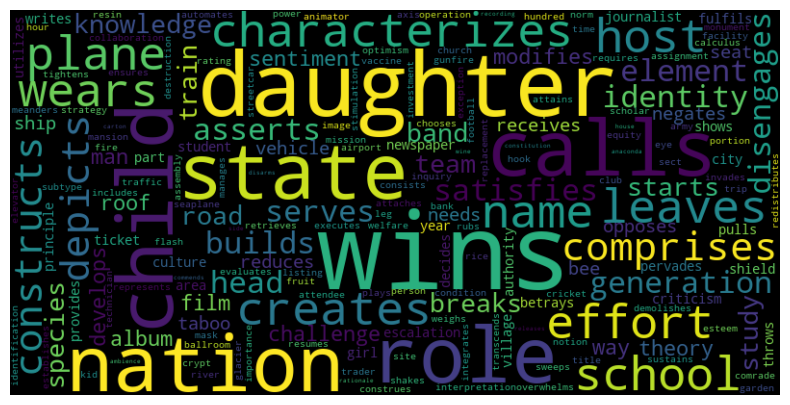

In [19]:
text_data_test = '\n'.join(test_df['text']) # using \n character as the delimiter btw texts in each row.
# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text_data_test)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## __Characterstic 2:__  Distribution of plausible and implausible categories

Here we can se that the dataset is balanced. This makes sense because the model don't have to learn that the probability of one category is higher than the other, even if the data in the real word look like that. 

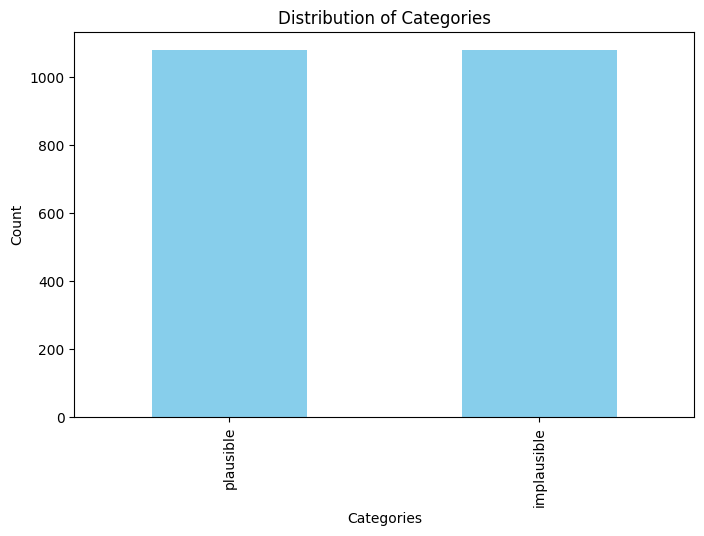

In [12]:
# Count the occurrences of each category
category_counts = df['category'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


## __Characterstic 3:__ Distribution of words 

In all of the splits we can notice that the majority of words occurs only onece or at least only few times.

### All

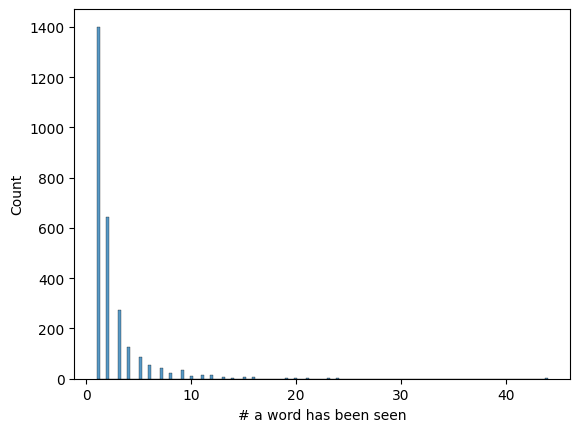

In [20]:
import seaborn as sns

# Tokenize the string into words
# Not needed
words = word_tokenize(text_data_all)

# Count the occurrences of each word
word_counts = Counter(words)

sns.histplot(word_counts).set(xlabel='# a word has been seen')
plt.show()



### Train

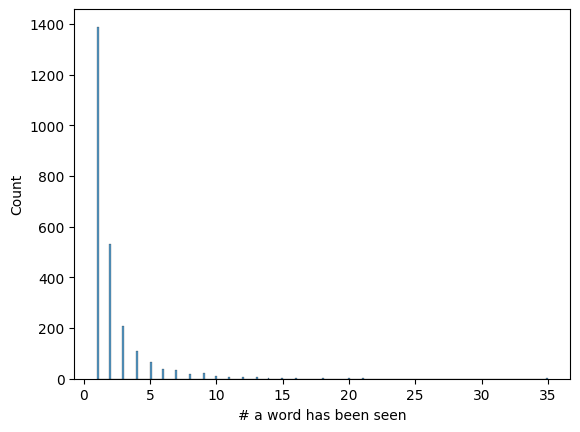

In [21]:
import seaborn as sns

# Tokenize the string into words
# Not needed
words = word_tokenize(text_data_train)

# Count the occurrences of each word
word_counts = Counter(words)

sns.histplot(word_counts).set(xlabel='# a word has been seen')
plt.show()



### Dev

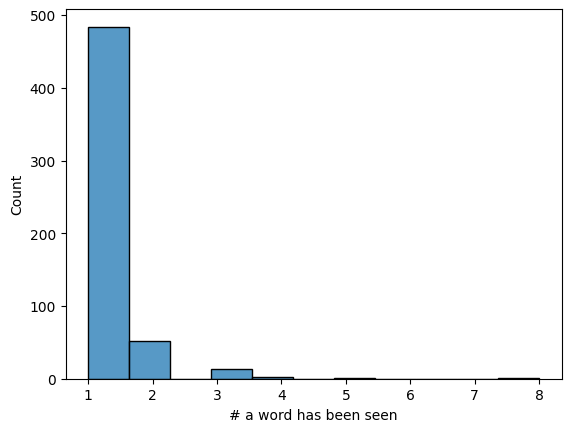

In [23]:
import seaborn as sns

# Tokenize the string into words
# Not needed
words = word_tokenize(text_data_dev)

# Count the occurrences of each word
word_counts = Counter(words)

sns.histplot(word_counts).set(xlabel='# a word has been seen')
plt.show()



### Test

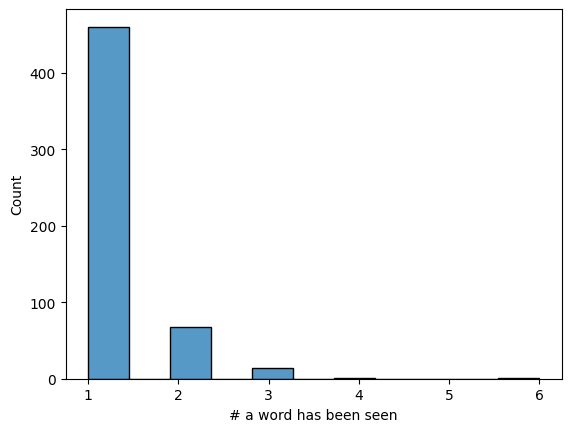

In [25]:
import seaborn as sns

# Tokenize the string into words
# Not needed
words = word_tokenize(text_data_test)

# Count the occurrences of each word
word_counts = Counter(words)

sns.histplot(word_counts).set(xlabel='# a word has been seen')
plt.show()



__Analysis:__ The majority of words are being seen only once in the dataset

## __Characterstic 4:__ Distribution of word length across the dataset

Here one can obaserve that the majority of the words have a lenght between 6 and 8 characters.

7.117283950617284


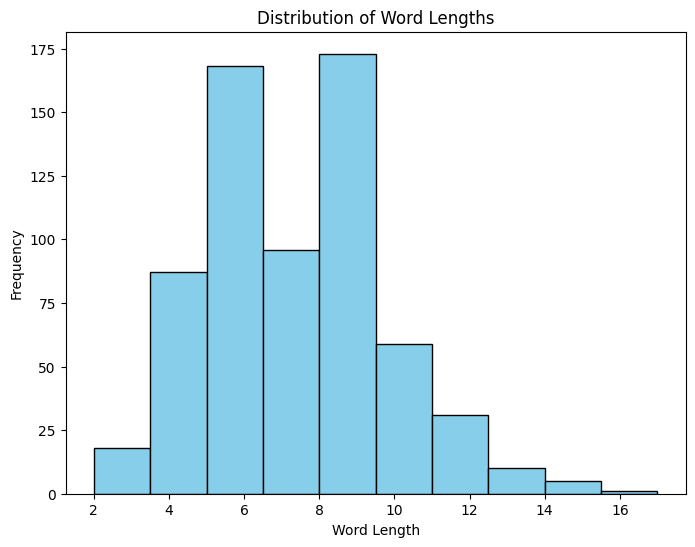

In [28]:
import numpy as np
import seaborn as sns

# Tokenize the text into words
words = word_tokenize(text_data)

# Calculate the length of each word
word_lengths = [len(word) for word in words]
# Compute the average word length
average_word_length = np.mean(word_lengths)
print(average_word_length)

plt.figure(figsize=(8, 6))
plt.hist(word_lengths, color='skyblue', edgecolor='black')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths')
plt.show()

## __Characterstic 5:__  Concreteness 

### Loads concreteness ratings list
Source: [Concreteness Ratings](https://github.com/ArtsEngine/concreteness/tree/master)

loading data 

In [30]:
BRM_PATH = '../datasets/brm'
conc_file = f'{BRM_PATH}/Concreteness_ratings_Brysbaert_et_al_BRM.txt'
conc_df = pd.read_csv(conc_file, sep="\t")
conc_df.head(2)

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.96,0,0
1,traindriver,0,4.54,0.71,3,29,0.90,0,0


maps words to concreteness ratings

In [46]:
word_to_concreteness_score_map = dict()
for idx, row in conc_df.iterrows():
    row = row.to_dict()
    word_to_concreteness_score_map[row['Word']] = row['Conc.M']/5.0 # Normalizing to a scale of 0 to 1



def get_concreteness_score(word):
    """
    Get the concreteness score of a word based on the Concreteness Ratings dataset.
    """
    # If the word is not found in the dataset, return a default score of 0.5
    return word_to_concreteness_score_map.get(word, 0.5)

def calculate_text_concreteness(text):
    """
    Calculate the concreteness score for a given text.
    """
    words = nltk.word_tokenize(text)
    concreteness_scores = [get_concreteness_score(word) for word in words]
    # Take the average concreteness score of all words in the text
    return sum(concreteness_scores) / len(concreteness_scores)

def calculate_nns_concreteness(text):
    """
    Calculate concreteness score for NNs
    """
    words = nltk.word_tokenize(text)
    nn1, v, nn2 = words[0], words[1], words[2]
    concreteness_scores = [get_concreteness_score(nn1), get_concreteness_score(nn2)]
    # Take the average concreteness score of all NNs in the text
    return sum(concreteness_scores) / len(concreteness_scores)


In [47]:
df['text_conc_score'] = df.text.apply(calculate_text_concreteness)
df['conc_nn_1'] = df.nn_1.apply(get_concreteness_score)
df['conc_v'] = df.v.apply(get_concreteness_score)
df['conc_nn_2'] = df.nn_2.apply(get_concreteness_score)
df['conc_nns'] = df.text.apply(calculate_nns_concreteness)

df.head(4)

,text,category,label,nn_1,v,nn_2,text_conc_score,conc_nn_1,conc_v,conc_nn_2,conc_nns
0,event occurs year,plausible,1,event,occurs,year,0.562667,0.538,0.5,0.650,0.594
1,tortoise brings limb,plausible,1,tortoise,brings,limb,0.800667,0.974,0.5,0.928,0.951
2,headliner overpowers function,implausible,1,headliner,overpowers,function,0.542667,0.744,0.5,0.384,0.564
3,county receives hour,plausible,0,county,receives,hour,0.642667,0.808,0.5,0.620,0.714


<Axes: xlabel='conc_nn_1', ylabel='Density'>

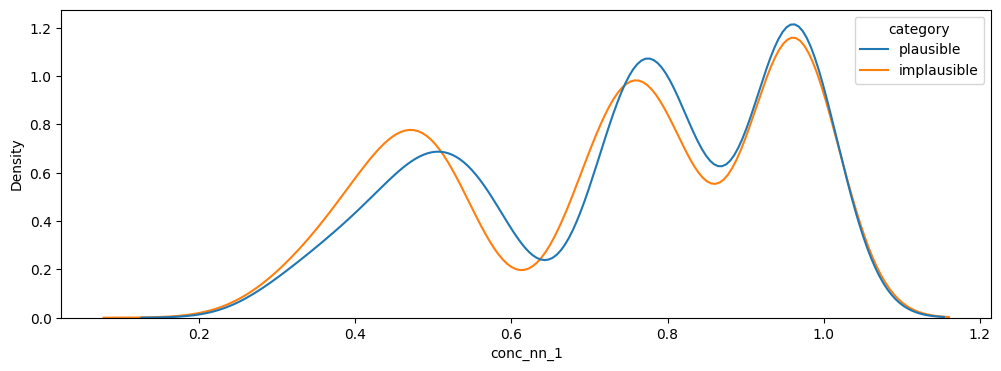

In [34]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(data=df, x='conc_nn_1', hue='category', ax=ax)

Here one can noticed that the majority of terms are concrete terms

<Axes: xlabel='conc_nn_2', ylabel='Density'>

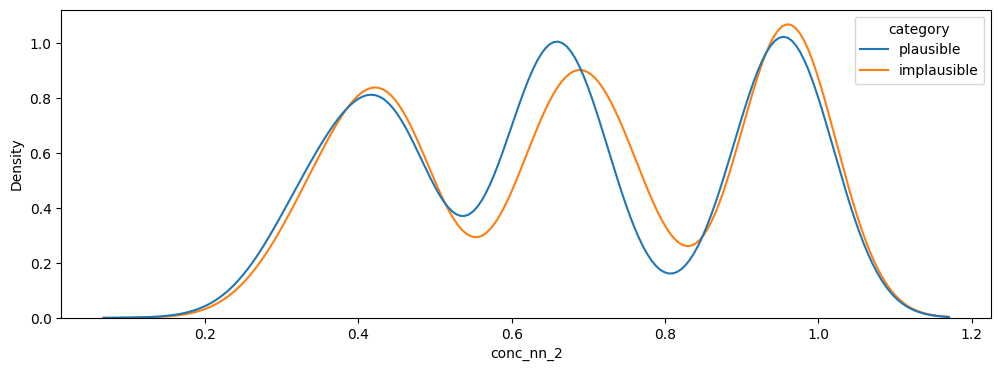

In [35]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(data=df, x='conc_nn_2', hue='category', ax=ax)

<Axes: xlabel='conc_v', ylabel='Density'>

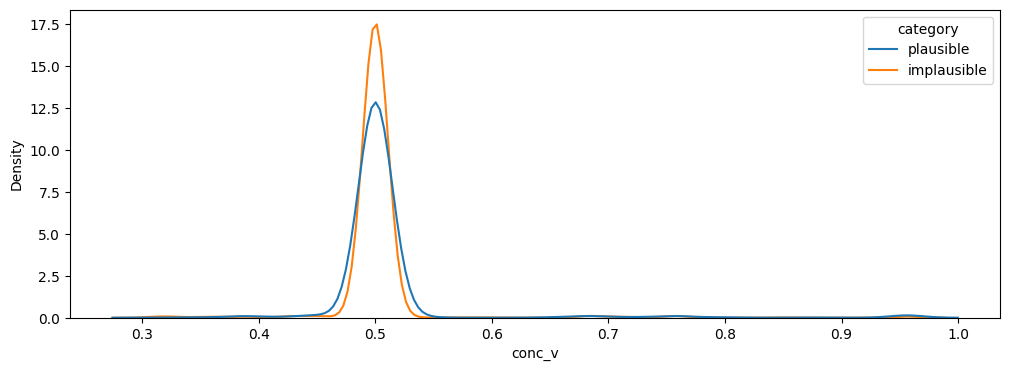

In [36]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(data=df, x='conc_v', hue='category', ax=ax)

The majority of verbs do not have an entry in the concreteness ratings list and a default value of 0.5 is being assigned to them.


### All (NN1, V, NN2)

Because allmost the majority of verbs are missing in the concreteness ratings list and because we added 0.5 concreteness of 0.5 for OOD (out of dictionary) words, based on the following graph one cannot assume that the majority of words are neither concrete nor abstract.

<Axes: xlabel='text_conc_score', ylabel='Density'>

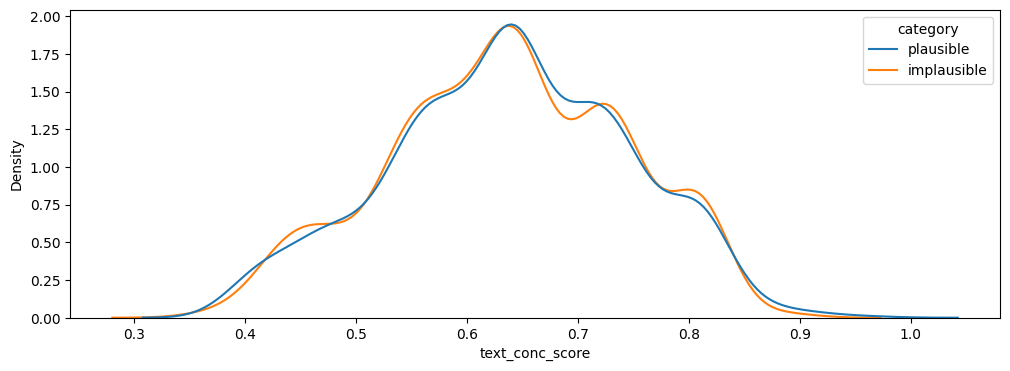

In [37]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(data=df, x='text_conc_score', hue='category', ax=ax)

# NNS without V

Following graphs is similar to the precious meaning that the disribution of abstractness in nouns without verbs is similar to the distribution of the nouns with the verbs.

<Axes: xlabel='conc_nns', ylabel='Density'>

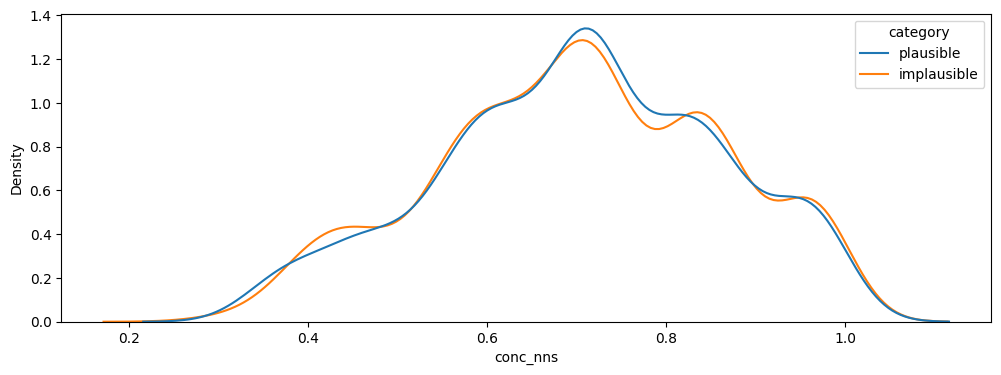

In [48]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 4))
sns.kdeplot(data=df, x='conc_nns', hue='category', ax=ax)

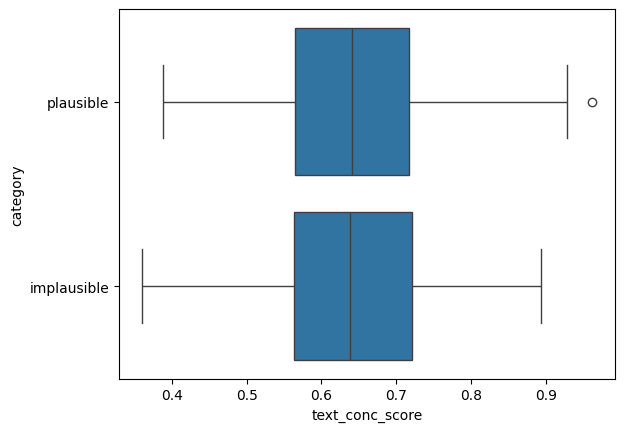

In [38]:
import seaborn as sns

sns.boxplot(df, x='text_conc_score', y='category')
plt.show()

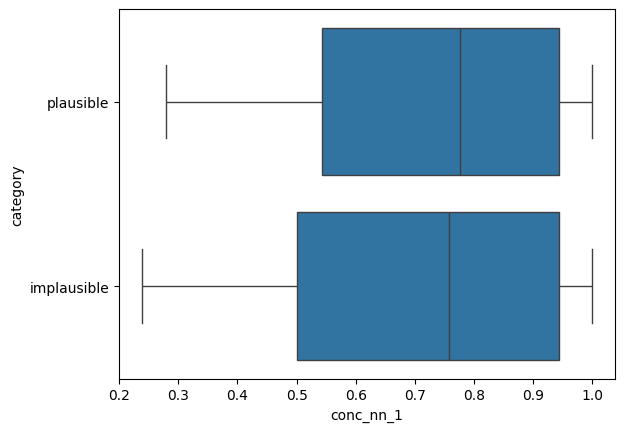

In [39]:
import seaborn as sns

sns.boxplot(df, x='conc_nn_1', y='category')
plt.show()

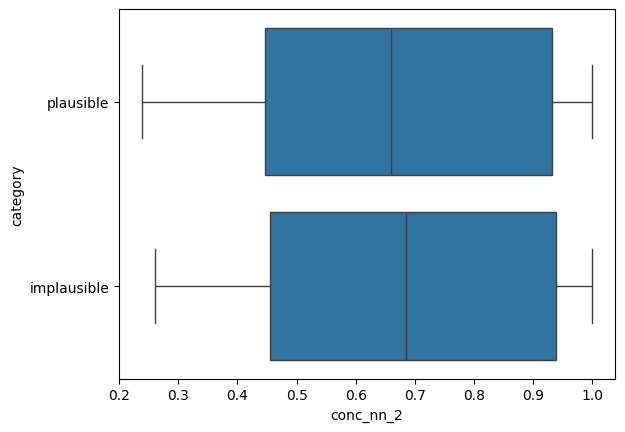

In [40]:
import seaborn as sns

sns.boxplot(df, x='conc_nn_2', y='category')
plt.show()